In [2]:
import pandas as pd
arr = pd.read_csv('winequality-red.csv',sep=';')
arr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
#preprocessing the data
bins = (2,6.5,8)
group_names = ['bad','good']
arr['quality'] = pd.cut(arr['quality'],bins=bins,labels=group_names)
arr['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [34]:
label_quality = LabelEncoder()

In [35]:
arr['quality'] = label_quality.fit_transform(arr['quality'])

In [36]:
arr['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

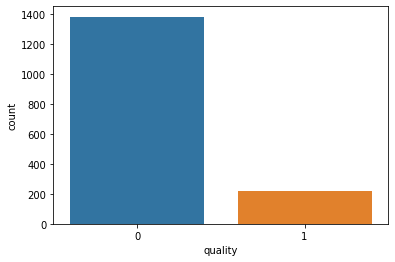

In [37]:
sns.countplot(arr['quality'])

In [38]:
#sepreate the datasets as responce variables and feature variables
x = arr.drop('quality' ,axis=1)
y = arr['quality']

In [39]:
#train and test split
x_train, x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
#appliing standard scaling to get optimal result
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [41]:
#random forest classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

In [42]:
# lets see how model is working 
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



In [43]:
print(confusion_matrix(y_test,pred_rfc))

[[263  10]
 [ 23  24]]


#svm classifier

In [48]:
clf = svm.SVC()
clf.fit(x_train,y_train)
pred_clf = clf.predict(x_test)


In [50]:
# lets see how model is working 
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [52]:
#nural network
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(x_train,y_train)
pred_mlpc = mlpc.predict(x_test)

E:\python\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [53]:
# lets see how model is working 
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.67      0.51      0.58        47

    accuracy                           0.89       320
   macro avg       0.79      0.73      0.76       320
weighted avg       0.88      0.89      0.88       320

[[261  12]
 [ 23  24]]


<img src="ml2.png"/>